In [1]:
#bonus
#importing libraries to generate a dataframe from csv data and perform preprocrssing 
#3.Find top 5 most correlated features to the target label(revenue) and then build a model 
#on top of those 5 features. Evaluate the model using MAE, MSE, RMSE and R2 score and then
#compare the result with the RMSE and R2 you achieved in question 2.
import pandas as pd
import numpy as np

In [30]:
#generating dataframe using csv file
train = pd.read_csv('train.csv').dropna()
#top 5 rows
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [31]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['revenue'].sort_values(ascending=False)[:], '\n')
print("\nNegative Correlation:")
print(corr['revenue'].sort_values(ascending=False)[-5:])

Positive Correlation:
revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64 


Negative Correlation:
P34   -0.072343
P10   -0.073220
P8    -0.084215
P13   -0.105085
P29   -0.114846
Name: revenue, dtype: float64


In [32]:
#top 5 corelated positive or negitive both features
y_train=train['revenue']
X_train=train[['P2','P28','P6','P13','P29']]

In [33]:
#training the model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions=model.predict(X_train)

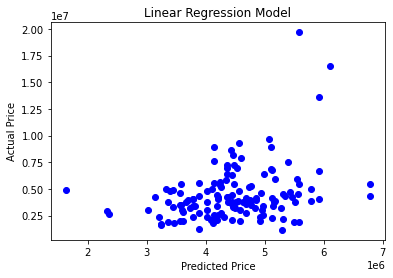

In [34]:
import matplotlib.pyplot as plt
plt.scatter(predictions, y_train, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [35]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, predictions)
mse = metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_train,predictions)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('r^2:', r2)

Mean Absolute Error: 1669243.3615216848
Mean Squared Error: 5913217630623.302
Root Mean Squared Error: 2431710.84436931
r^2: 0.10238590445014917


In [36]:
#positively corelated positive features
y_train=train['revenue']
X_train=train[['P2','P28','P6','P21','P11']]

In [37]:
#training the model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions=model.predict(X_train)

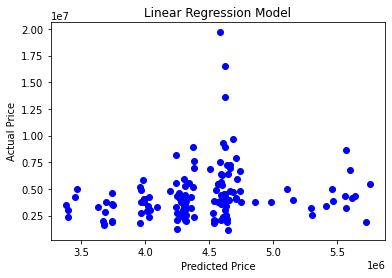

In [38]:
import matplotlib.pyplot as plt
plt.scatter(predictions, y_train, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [39]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, predictions)
mse = metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_train,predictions)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('r^2:', r2)

Mean Absolute Error: 1637530.083762989
Mean Squared Error: 6339957718304.595
Root Mean Squared Error: 2517927.266285624
r^2: 0.037607649739011206
